In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("zomato.csv")
print(df.info())


print(df['Price'].describe())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         142 non-null    object 
 1   Date             142 non-null    object 
 2   Day              142 non-null    object 
 3   Time             142 non-null    object 
 4   Meal             142 non-null    object 
 5   Restaurant       142 non-null    object 
 6   City             142 non-null    object 
 7   Type             142 non-null    object 
 8   Food1            142 non-null    object 
 9   Quantity1        142 non-null    int64  
 10  Food2            81 non-null     object 
 11  Quantity2        81 non-null     float64
 12  Price            142 non-null    int64  
 13  Mode of Payment  142 non-null    object 
dtypes: float64(1), int64(2), object(11)
memory usage: 15.7+ KB
None
count    142.000000
mean     234.422535
std       92.001413
min      102.000000
25%      1

,Platform,Date,Day,Time,Meal,Restaurant,City,Type,Food1,Quantity1,Food2,Quantity2,Price,Mode of Payment
0,Zomato,1/9/23,Monday,17:05,Snack,Pizza Hut,Nellore,American,Pizza,2,NaN,NaN,223,COD
1,Zomato,1/13/23,Friday,16:15,Snack,Coffea,Raipur,Chinesse,Soup,2,NaN,NaN,180,UPI
2,Zomato,1/14/23,Saturday,15:16,Lunch,Pizza Hut,Nellore,American,Pizza,2,NaN,NaN,203,COD
3,Zomato,1/22/23,Sunday,23:33,Midnight Snack,Pizza Hut,Raipur,American,Pizza,2,NaN,NaN,144,COD
4,Zomato,1/24/23,Tuesday,17:57,Miscellenous,Mystery Cafe & Bakes,Raipur,Dessert,Cake,1,NaN,NaN,525,UPI


In [ ]:
#data cleaning


df['Food2'].fillna('None', inplace=True)
df['Quantity2'].fillna('None', inplace=True)
df.info()
df = df.replace('Manchurian', 'Manchuria')
df = df.replace('The pancake co','The Pancake co')
df = df.replace("L Pino'z",'La Pinoz')
df = df.replace("La Pinozo",'La Pinoz')
df = df.replace("The Good Bowl",'Good Bowl')
df = df.replace("The Nomads Cafe",'Nomads Cafe')
df.iloc[94, df.columns.get_loc('Date ')] = '10/20/24'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Platform         142 non-null    object
 1   Date             142 non-null    object
 2   Day              142 non-null    object
 3   Time             142 non-null    object
 4   Meal             142 non-null    object
 5   Restaurant       142 non-null    object
 6   City             142 non-null    object
 7   Type             142 non-null    object
 8   Food1            142 non-null    object
 9   Quantity1        142 non-null    int64 
 10  Food2            142 non-null    object
 11  Quantity2        142 non-null    object
 12  Price            142 non-null    int64 
 13  Mode of Payment  142 non-null    object
dtypes: int64(2), object(12)
memory usage: 15.7+ KB


<ipython-input-32-ea8c01920b2b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Food2'].fillna('None', inplace=True)
<ipython-input-32-ea8c01920b2b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [ ]:
df['Date '] = pd.to_datetime(df['Date '])
no_of_days = (df['Date '].max() - df['Date '].min()).days
price_sum = df['Price'].sum()
print(no_of_days)
print(price_sum)

print(f"avg spending per day: {(price_sum/no_of_days):.2f}")
df.head()

764
33288
avg spending per day: 43.57


<ipython-input-33-59defc337b33>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date '] = pd.to_datetime(df['Date '])


,Platform,Date,Day,Time,Meal,Restaurant,City,Type,Food1,Quantity1,Food2,Quantity2,Price,Mode of Payment
0,Zomato,2023-01-09,Monday,17:05,Snack,Pizza Hut,Nellore,American,Pizza,2,None,None,223,COD
1,Zomato,2023-01-13,Friday,16:15,Snack,Coffea,Raipur,Chinesse,Soup,2,None,None,180,UPI
2,Zomato,2023-01-14,Saturday,15:16,Lunch,Pizza Hut,Nellore,American,Pizza,2,None,None,203,COD
3,Zomato,2023-01-22,Sunday,23:33,Midnight Snack,Pizza Hut,Raipur,American,Pizza,2,None,None,144,COD
4,Zomato,2023-01-24,Tuesday,17:57,Miscellenous,Mystery Cafe & Bakes,Raipur,Dessert,Cake,1,None,None,525,UPI


In [ ]:
Platform = df['Platform'].unique()
Day = df['Day'].unique()
Meal = df['Meal'].unique()
Restaurant = df['Restaurant'].unique()
City = df['City'].unique()
Food1 = df['Food1'].unique()
Food2 = df.loc[df['Food2'] != 'None', 'Food2'].unique()
Food = np.concatenate((Food1, Food2))
Food = np.unique(Food)
Mode_of_Payment = df['Mode of Payment'].unique()
Type = df['Type'].unique()
flattened_types = [cuisine.strip() for types in Type for cuisine in types.split(',')]
Type = np.unique(flattened_types)

print(Platform)
print(Day)
print(Meal)
print(Restaurant)
print(City)
print(Food)
print(Mode_of_Payment)
print(Type)





['Zomato' 'Swiggy']
['Monday' 'Friday' 'Saturday' 'Sunday' 'Tuesday' 'Wednesday' 'Thursday']
['Snack' 'Lunch' 'Midnight Snack' 'Miscellenous' 'Dinner' 'Breakfast']
['Pizza Hut' 'Coffea' 'Mystery Cafe & Bakes' "McDonald's" 'La Pinoz'
 'More Over Coffess' 'Little Hut' 'KFC' 'Eden' 'Mad Bakers' 'Crossroads'
 'Wafflez' 'Biriyani By Kilo' 'Chawal Bowl' "Vennela's Sai Zero Degrees"
 'RR Point' 'Dwarika' 'The Pancake co' 'Kiva' 'Nomads Cafe' 'Malgudi'
 'Good Bowl' 'Dominos' 'Exotica' 'Kritunga' 'Namaskaram Oota'
 'Kauzina Kafe' 'AL Lazees' 'Ramji Khana Khazana' '90s Cafe'
 'Kailash Parbat' 'Cad M Cad B' 'Idli&Dosa Junction' 'Pizza Project'
 'Behrouz Biriyani' 'Belgian Waffle Co.' 'Unlimited Biriyani' "Haldiram's"
 'Tiffins By The 90s Cafe' 'LunchBox' 'A1 Restaurant' 'Real Momo'
 'Kaaram Podi']
['Nellore' 'Raipur' 'Bhilai' 'Secunderabad' 'Chirala' 'Vijayawada']
['Biriyani' 'Burger' 'Butter Naan' 'Cake' 'Chaat' 'Crispy Corn' 'Dosa'
 'Fried Rice' 'Fries' 'Garlic Bread' 'Garlic Rice' 'Ice Cream' 

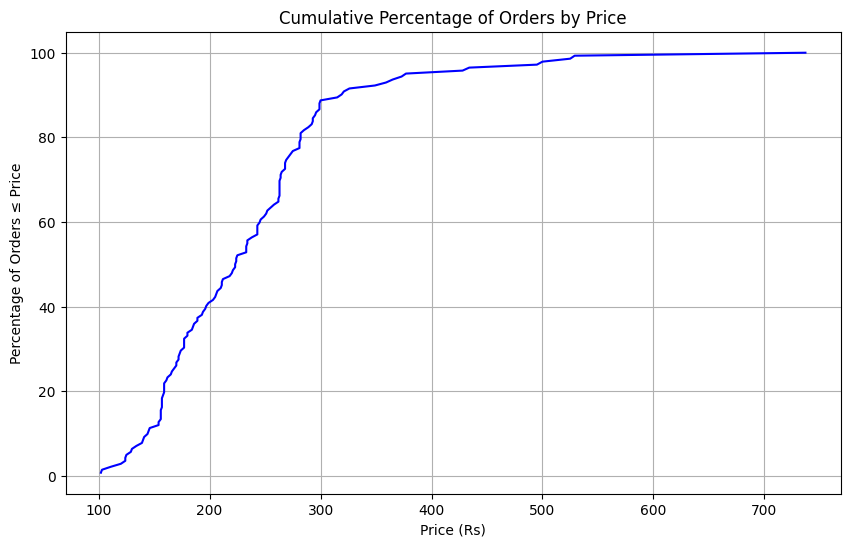

In [ ]:
sorted_prices = np.sort(df['Price'])

# Step 2: Calculate the cumulative percentage of entries
cumulative_percentage = np.arange(1, len(sorted_prices) + 1) / len(sorted_prices) * 100

# Step 3: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sorted_prices, cumulative_percentage, linestyle='-', color='b')
plt.title('Cumulative Percentage of Orders by Price')
plt.xlabel('Price (Rs)')
plt.ylabel('Percentage of Orders ≤ Price')
plt.grid(True)
plt.show()

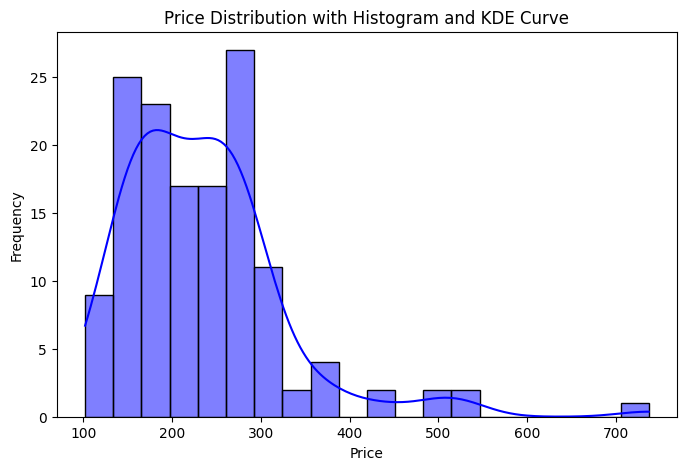

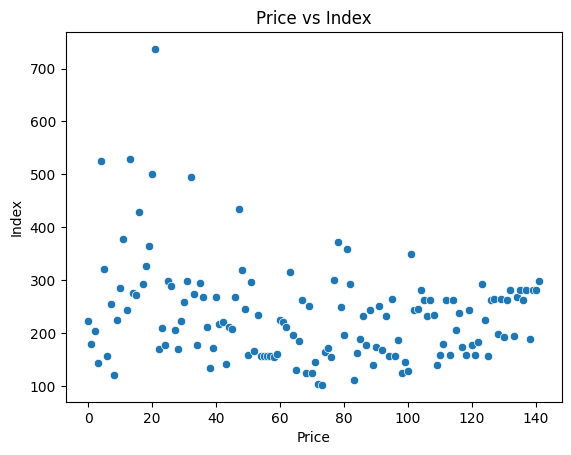

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=20, kde=True, color='blue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution with Histogram and KDE Curve')


plt.show()

sns.scatterplot(x = df.index, y = df['Price']  )
plt.xlabel('Price')
plt.ylabel('Index')
plt.title('Price vs Index')
plt.show()


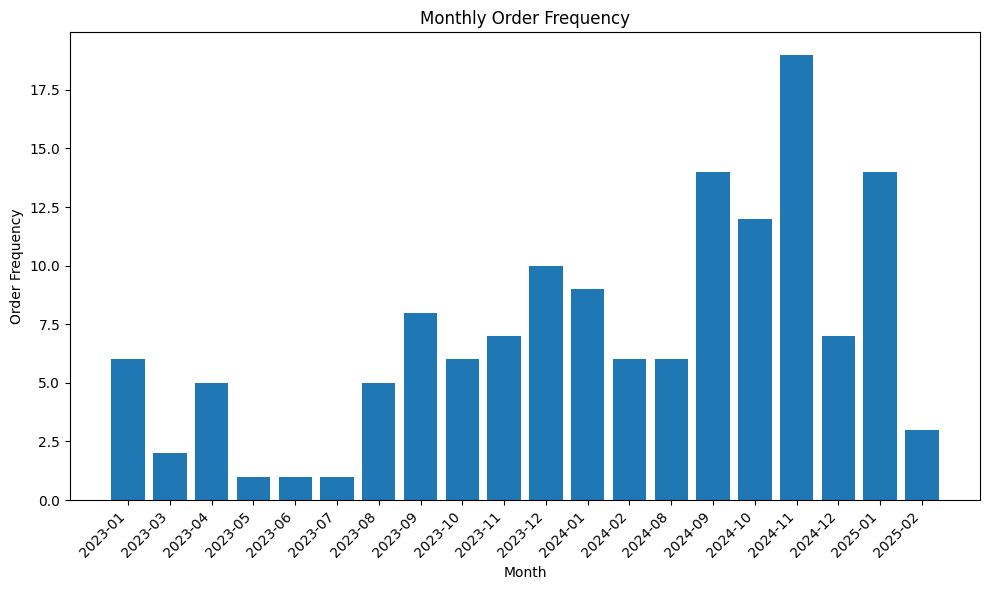

In [ ]:
df["Date "] = pd.to_datetime(df["Date "])

# Create a 'Month' column (as string in "YYYY-MM" format)
df["Month"] = df["Date "].dt.to_period("M").astype(str)

# Group by Month and count the number of orders
monthly_counts = df["Month"].value_counts().sort_index().reset_index()
monthly_counts.columns = ["Month", "Order Frequency"]

# Create the bar chart (histogram)
# Pass the 'Month' column as x and 'Order Frequency' as the height of the bars
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(monthly_counts["Month"], monthly_counts["Order Frequency"])
plt.xlabel("Month")
plt.ylabel("Order Frequency")
plt.title("Monthly Order Frequency")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

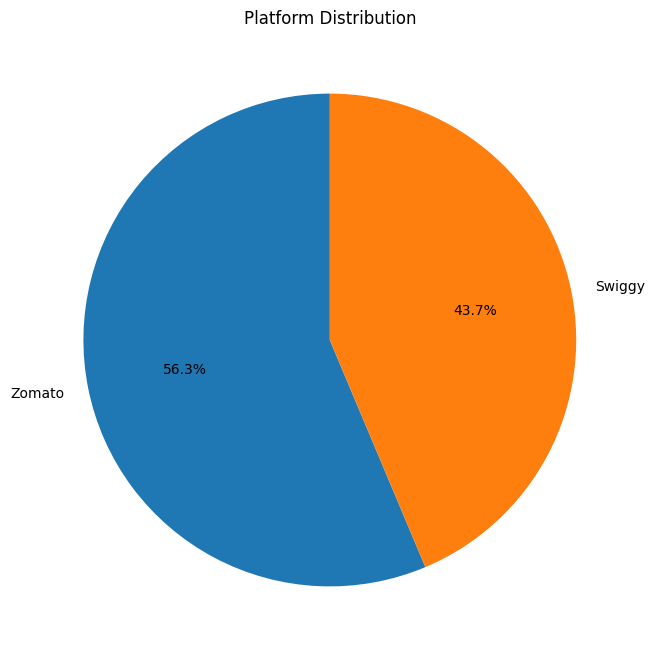

In [ ]:
#platform pie chart

plt.figure(figsize=(8, 8))
platform_counts = df['Platform'].value_counts()
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Platform Distribution')
plt.show()

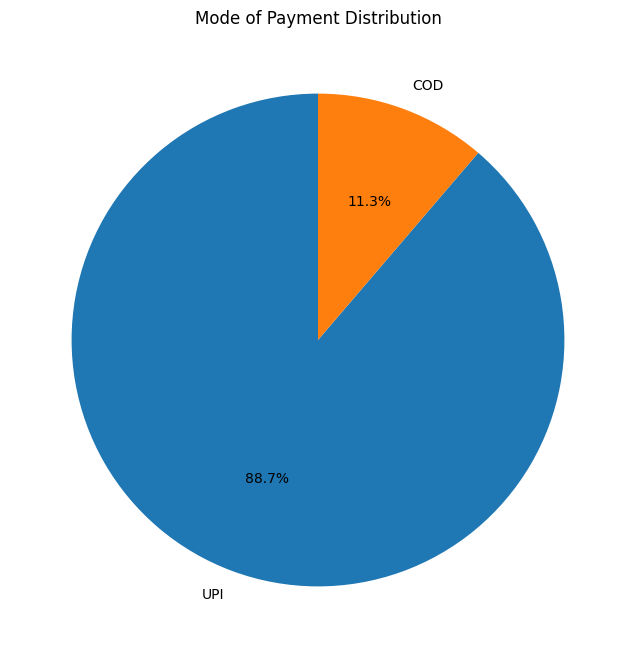

In [ ]:
#pie chart of mode of payment

plt.figure(figsize=(8, 8))
mode_of_payment_counts = df['Mode of Payment'].value_counts()
plt.pie(mode_of_payment_counts, labels=mode_of_payment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Mode of Payment Distribution')
plt.show()

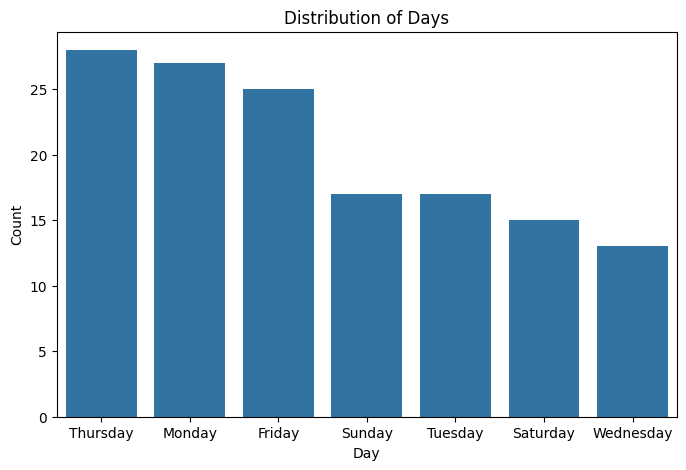

In [ ]:
#distribution of day

plt.figure(figsize=(8, 5))
sns.countplot(x='Day', data=df ,order=df['Day'].value_counts().index)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Distribution of Days')
plt.show()

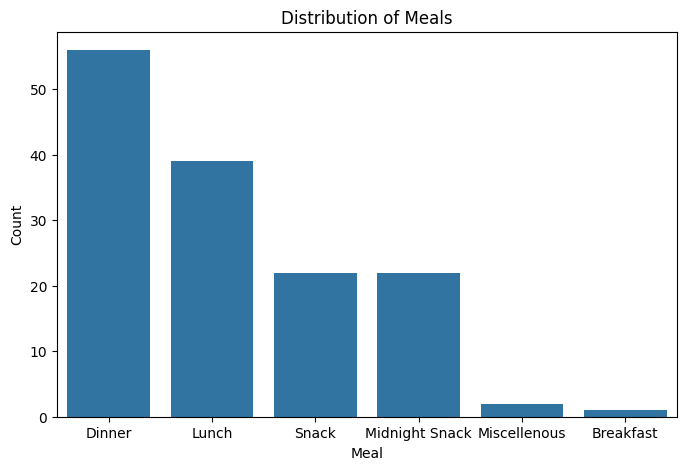

In [ ]:
#Distribution of meal

plt.figure(figsize=(8, 5))
sns.countplot(x='Meal', data=df ,order=df['Meal'].value_counts().index)
plt.xlabel('Meal')
plt.ylabel('Count')
plt.title('Distribution of Meals')
plt.show()

In [ ]:
#bar plot of restaurant

plt.figure(figsize=(18, 4))
restaurant_counts = df['Restaurant'].value_counts().head(10)
#.head(val) for top val restaurants
plt.bar(restaurant_counts.index, restaurant_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Restaurant')
plt.ylabel('Count')
plt.title('Restaurants')
plt

NameError: name 'plt' is not defined

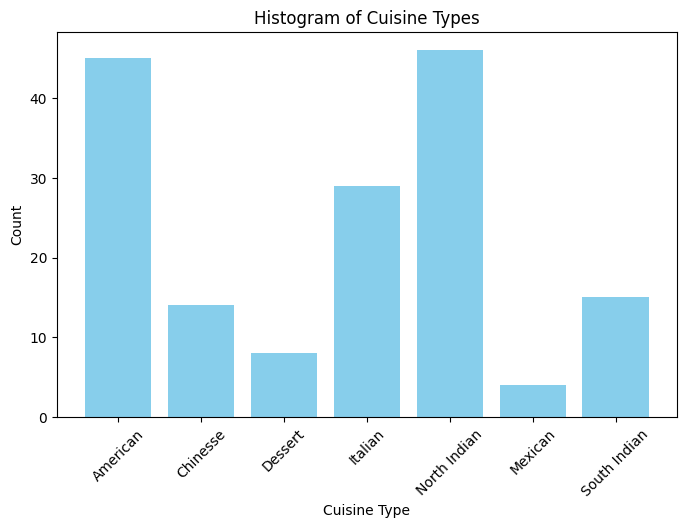

In [ ]:
#distribution of type
from collections import Counter


all_types = [t.strip() for sublist in df['Type'].str.split(',') for t in sublist]

# Step 2: Count Occurrences
type_counts = Counter(all_types)

# Step 3: Plot Histogram
plt.figure(figsize=(8, 5))
plt.bar(type_counts.keys(), type_counts.values(), color='skyblue')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.title('Histogram of Cuisine Types')
plt.xticks(rotation=45)
plt.show()


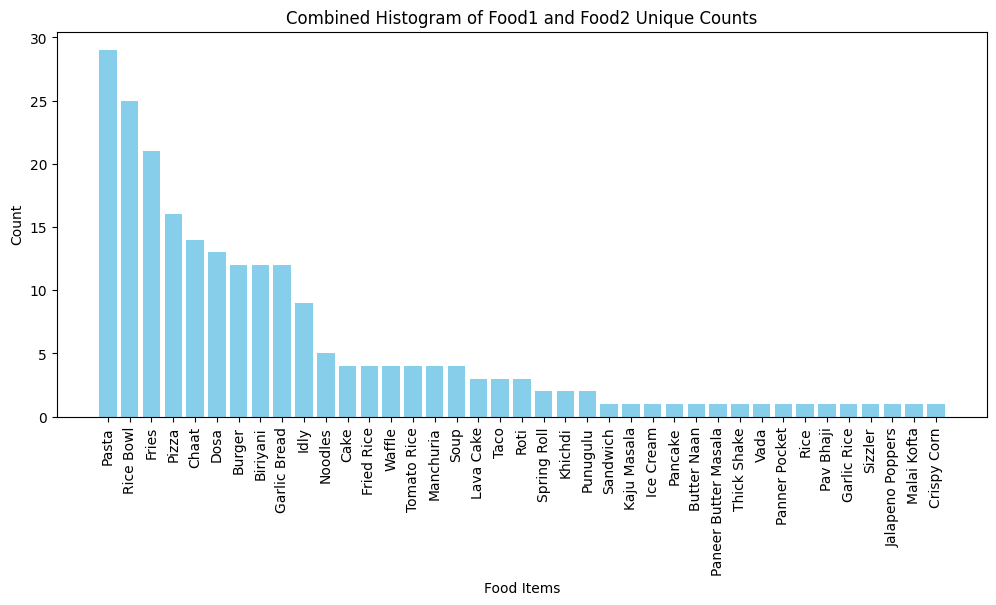

In [ ]:
#distribution of food

value_counts = (
    df[['Food1', 'Food2']]
    .melt(value_name='food')
    .query("food != 'None'")  # Removes string 'None' values
    ['food']
    .value_counts()
)
# Plot histogram
plt.figure(figsize=(12, 5))
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('Food Items')
plt.ylabel('Count')
plt.title('Combined Histogram of Food1 and Food2 Unique Counts')
plt.xticks(rotation=90)
plt.show()


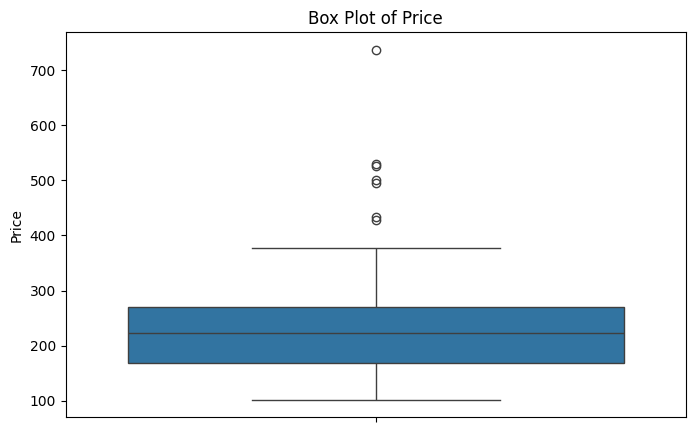

In [ ]:
#box plot of price

plt.figure(figsize=(8, 5))
sns.boxplot( y='Price', data=df)
plt.ylabel('Price')
plt.title('Box Plot of Price')
plt.show()

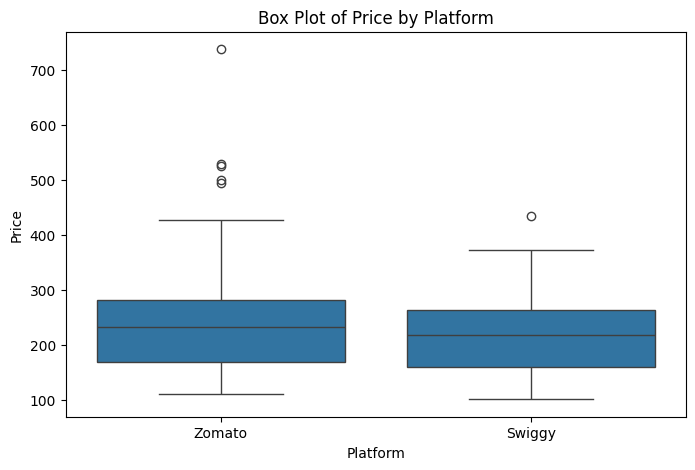

In [ ]:
#box plot of price by platform

plt.figure(figsize=(8, 5))
sns.boxplot(x='Platform', y='Price', data=df)
plt.xlabel('Platform')
plt.ylabel('Price')
plt.title('Box Plot of Price by Platform')
plt.show()

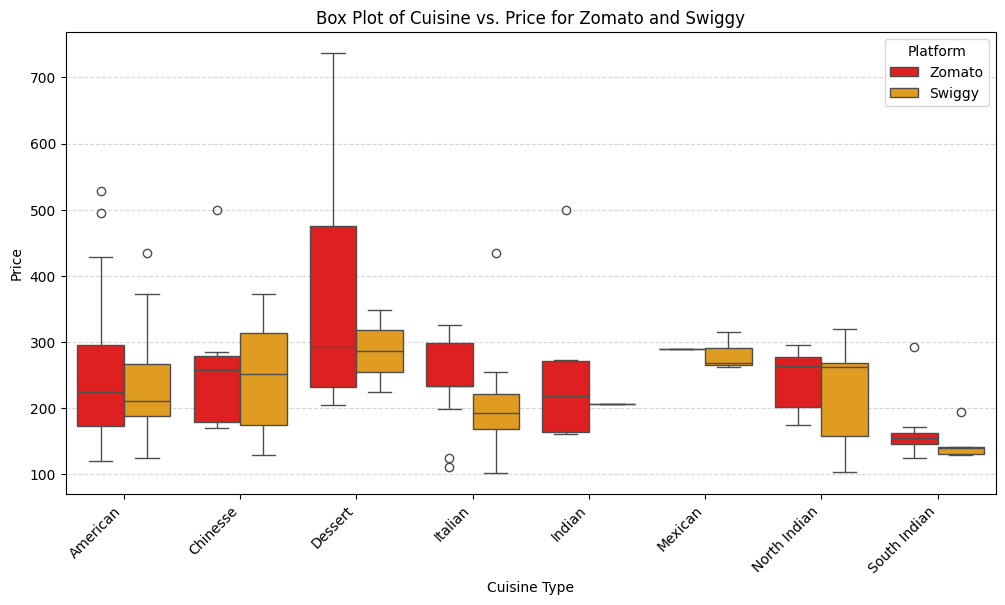

In [ ]:
#cuisine vs price for both platforms

expanded_rows = []
for index, row in df.iterrows():
    types = row['Type'].split(',')
    for t in types:
        expanded_rows.append({'Cuisine': t.strip(), 'Price': row['Price'], 'Platform': row['Platform']})

df_expanded = pd.DataFrame(expanded_rows)

# Step 2: Box Plot
plt.figure(figsize=(12, 6))

sns.boxplot(x='Cuisine', y='Price', hue='Platform', data=df_expanded,
            palette={'Zomato': 'red', 'Swiggy': 'orange'})

plt.xlabel('Cuisine Type')
plt.ylabel('Price')
plt.title('Box Plot of Cuisine vs. Price for Zomato and Swiggy')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


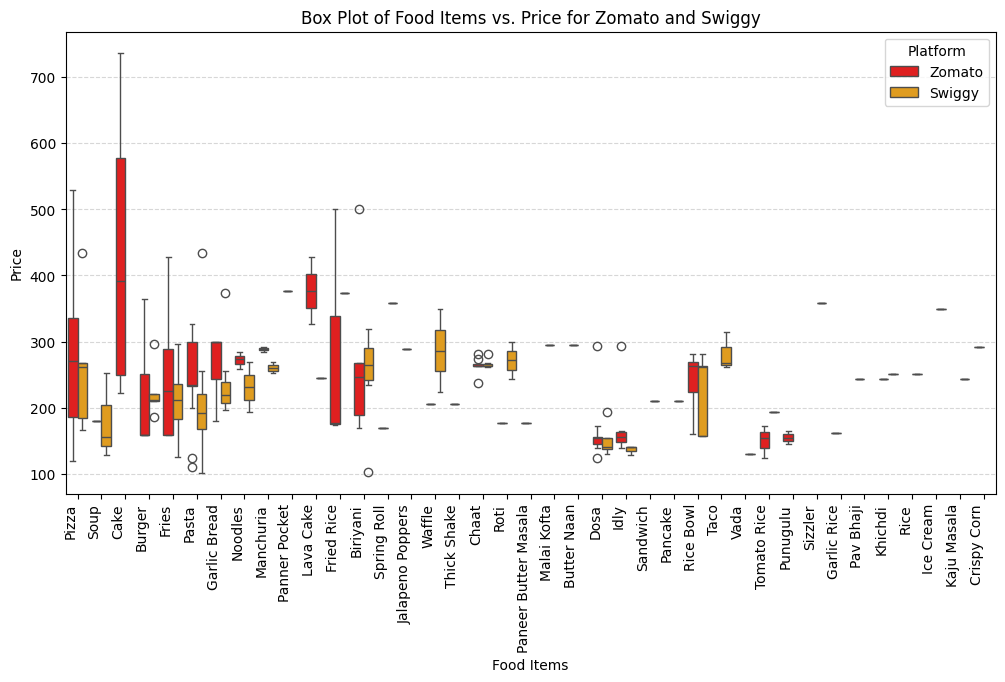

In [ ]:
#food vs. price in both zomato and swiggy


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Expand the 'Food1' and 'Food2' columns into a single column, removing 'None'
expanded_rows = []
for index, row in df.iterrows():
    if pd.notna(row['Food1']) and row['Food1'] != 'None':
        expanded_rows.append({'Food': row['Food1'], 'Price': row['Price'], 'Platform': row['Platform']})
    if pd.notna(row['Food2']) and row['Food2'] != 'None':
        expanded_rows.append({'Food': row['Food2'], 'Price': row['Price'], 'Platform': row['Platform']})

df_expanded = pd.DataFrame(expanded_rows)

# Step 2: Box Plot
plt.figure(figsize=(12, 6))

sns.boxplot(x='Food', y='Price', hue='Platform', data=df_expanded,
            palette={'Zomato': 'red', 'Swiggy': 'orange'})

plt.xlabel('Food Items')
plt.ylabel('Price')
plt.title('Box Plot of Food Items vs. Price for Zomato and Swiggy')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Platform')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()



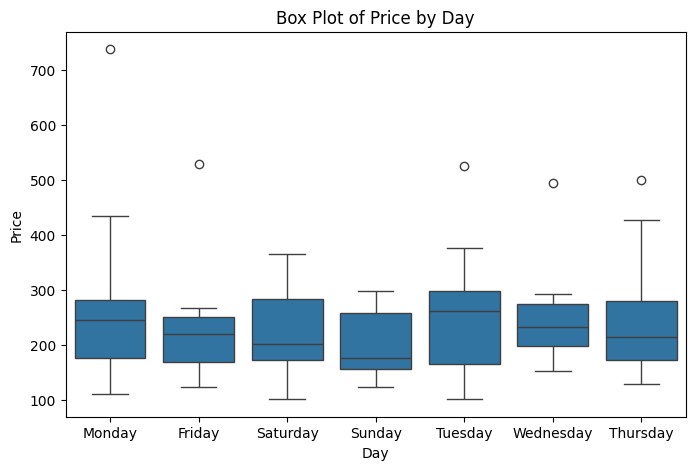

In [ ]:
#day vs price box plot

plt.figure(figsize=(8, 5))
sns.boxplot(x='Day', y='Price', data=df)
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Box Plot of Price by Day')
plt.show()

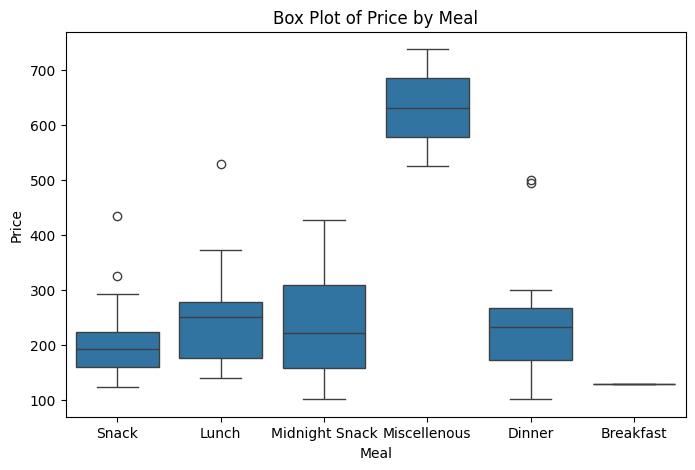

In [ ]:
#meal vs price box plot

plt.figure(figsize=(8, 5))
sns.boxplot(x='Meal', y='Price', data=df)
plt.xlabel('Meal')
plt.ylabel('Price')
plt.title('Box Plot of Price by Meal')
plt.show()

Text(0.5, 1.0, 'Box Plot of Price by Restaurant')

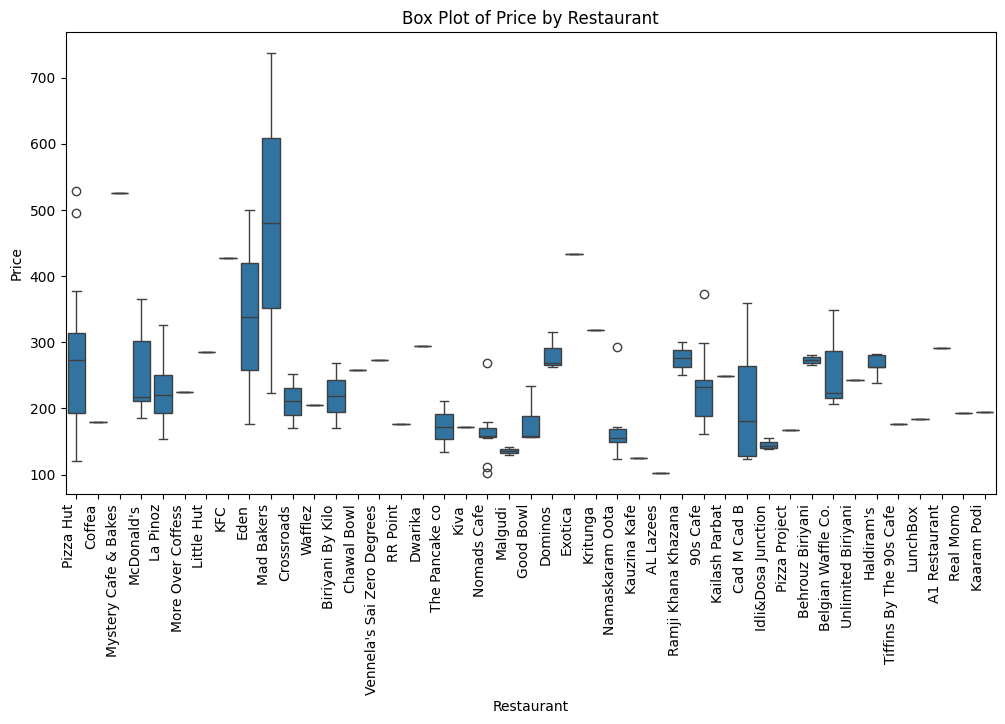

In [ ]:
#restaurant vs price box plot

plt.figure(figsize=(12, 6))
sns.boxplot(x='Restaurant', y='Price', data=df)
plt.xlabel('Restaurant')
plt.ylabel('Price')
plt.xticks(rotation=90, ha='right')
plt.title('Box Plot of Price by Restaurant')

<ipython-input-35-19e852c7bb2a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])
<ipython-input-35-19e852c7bb2a>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['Day', 'TimeSlot']).size().unstack(fill_value=0)


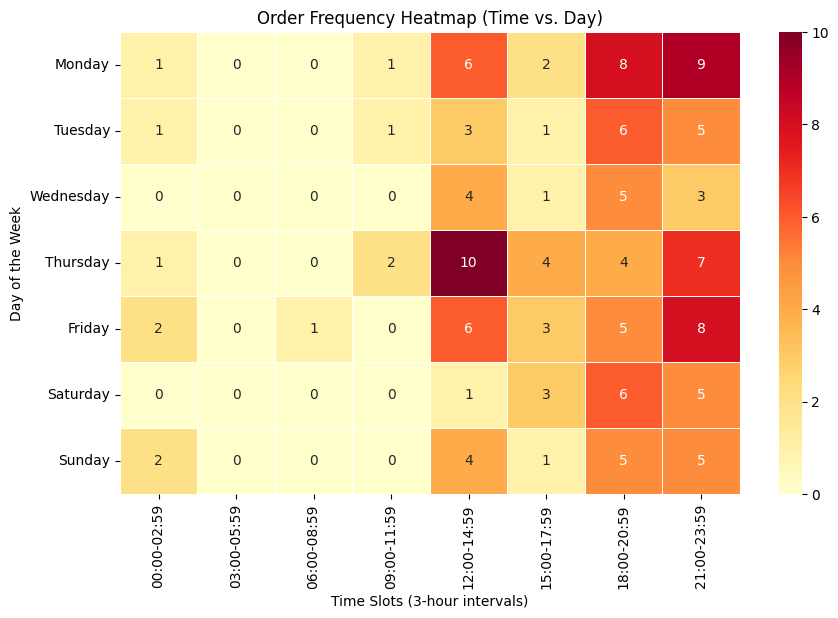

In [ ]:

df['Time'] = pd.to_datetime(df['Time'])

# Extract hour and bin into 3-hour intervals
df['Hour'] = df['Time'].dt.hour
df['TimeSlot'] = pd.cut(df['Hour'], bins=range(0, 25, 3), right=False, labels=[
    '00:00-02:59', '03:00-05:59', '06:00-08:59', '09:00-11:59',
    '12:00-14:59', '15:00-17:59', '18:00-20:59', '21:00-23:59'
])

# Ensure 'Day' is ordered correctly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day'] = pd.Categorical(df['Day'], categories=days_order, ordered=True)

# Group by 'Day' and 'TimeSlot' and count orders
heatmap_data = df.groupby(['Day', 'TimeSlot']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5)
plt.title('Order Frequency Heatmap (Time vs. Day)')
plt.xlabel('Time Slots (3-hour intervals)')
plt.ylabel('Day of the Week')
plt.show()

<ipython-input-36-95b1110c085c>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data_freq = df.groupby(['Meal', 'Day']).size().unstack(fill_value=0)


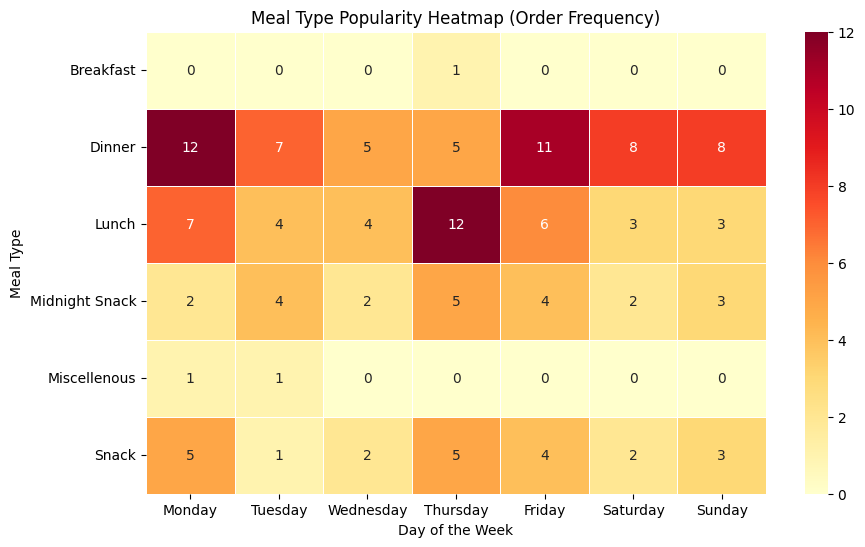

In [ ]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day'] = pd.Categorical(df['Day'], categories=days_order, ordered=True)

# Group by 'Meal' and 'Day' and calculate order frequency or average price
# For order frequency:
heatmap_data_freq = df.groupby(['Meal', 'Day']).size().unstack(fill_value=0)


# Plot the heatmap for order frequency
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_freq, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5)
plt.title('Meal Type Popularity Heatmap (Order Frequency)')
plt.xlabel('Day of the Week')
plt.ylabel('Meal Type')
plt.show()



Unique Meal Types: ['Snack' 'Lunch' 'Midnight Snack' 'Miscellenous' 'Dinner' 'Breakfast']

Unique Cuisine Types: ['American' 'Chinesse' 'Dessert' 'Italian' 'North Indian' 'Mexican'
 'South Indian']


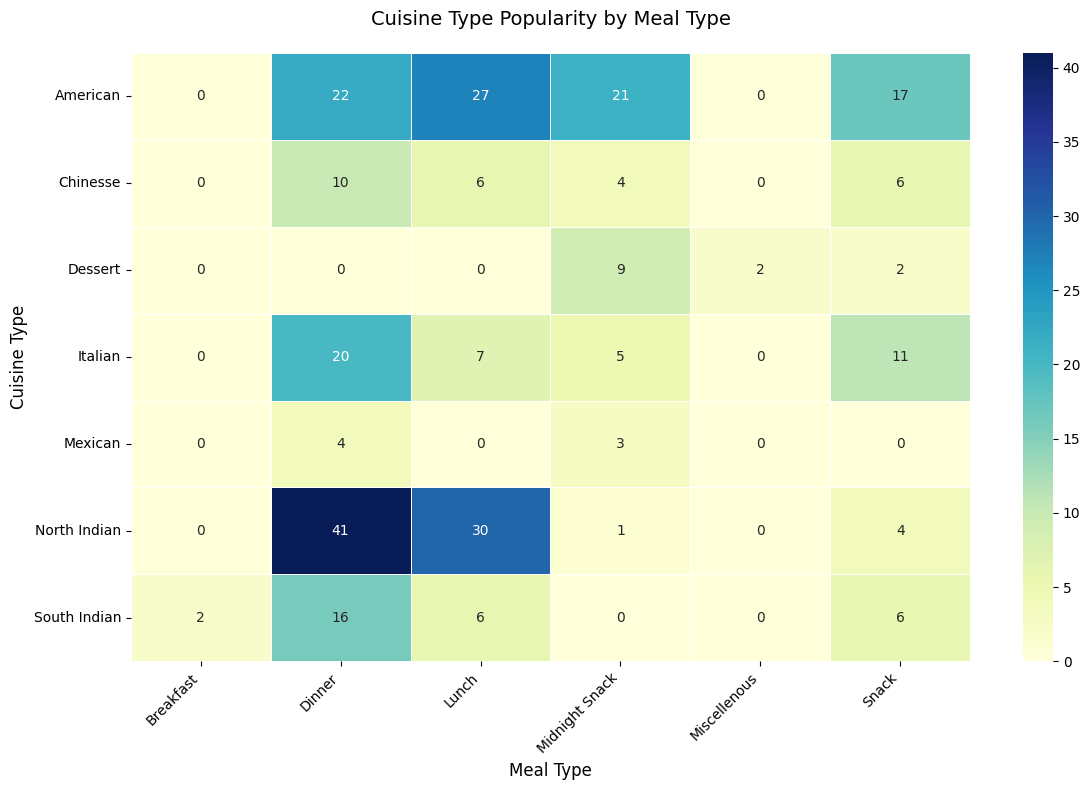

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract unique values
unique_meals = df['Meal'].unique()
unique_cuisines = df['Type'].str.split(',').explode().str.strip().unique()

print("Unique Meal Types:", unique_meals)
print("\nUnique Cuisine Types:", unique_cuisines)

# Clean and prepare data
# Explode combined cuisine types and clean whitespace
df['Type'] = df['Type'].str.split(',')
df_exploded = df.explode('Type')
df_exploded['Type'] = df_exploded['Type'].str.strip()

# Convert quantities to numeric and handle missing values
df_exploded['Quantity1'] = pd.to_numeric(df_exploded['Quantity1'], errors='coerce').fillna(0)
df_exploded['Quantity2'] = pd.to_numeric(df_exploded['Quantity2'], errors='coerce').fillna(0)
df_exploded['Total_Quantity'] = df_exploded['Quantity1'] + df_exploded['Quantity2']

# Create pivot table
heatmap_data = df_exploded.pivot_table(
    index='Type',
    columns='Meal',
    values='Total_Quantity',
    aggfunc='sum',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='g',  # 'g' format shows full numbers without scientific notation
    cmap='YlGnBu',
    linewidths=.5
)

plt.title('Cuisine Type Popularity by Meal Type', pad=20, fontsize=14)
plt.xlabel('Meal Type', fontsize=12)
plt.ylabel('Cuisine Type', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

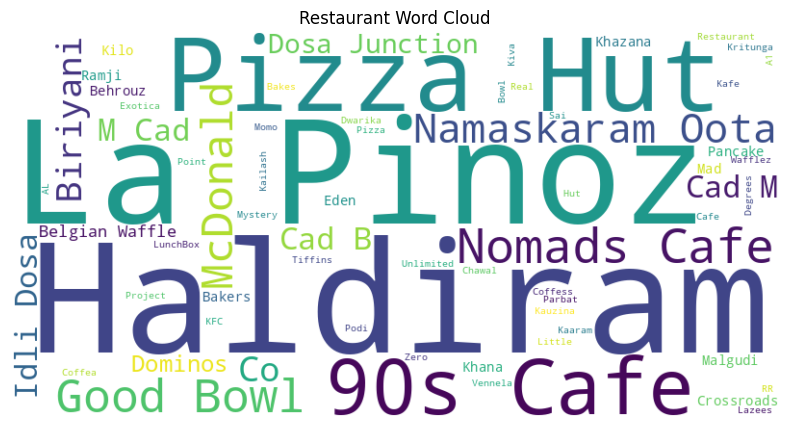

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Combine 'Food1' and 'Food2' into a single text corpus, excluding 'None'
food_corpus = ' '.join(df[df['Food1'] != 'None']['Food1']) + ' ' + ' '.join(df[df['Food2'] != 'None']['Food2'])

# Generate word cloud for restaurants, excluding 'None'
restaurant_corpus = ' '.join(df[df['Restaurant'] != 'None']['Restaurant'])
restaurant_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(restaurant_corpus)

# Generate word cloud for combined food columns, excluding 'None'
food_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(food_corpus)

# Plot the restaurant word cloud
plt.figure(figsize=(10, 5))
plt.imshow(restaurant_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Restaurant Word Cloud')
plt.show()

# Plot the food word cloud
# plt.figure(figsize=(10, 5))
# plt.imshow(food_wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Food Word Cloud')
# plt.show()

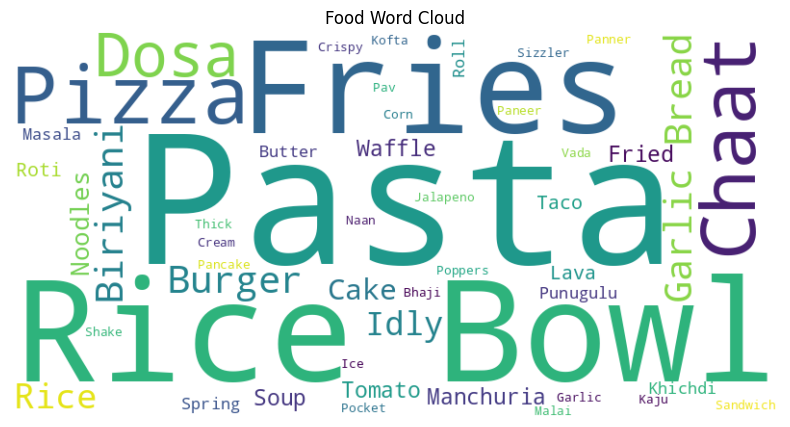

In [ ]:


# Plot the food word cloud
plt.figure(figsize=(10, 5))
plt.imshow(food_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Food Word Cloud')
plt.show()

<ipython-input-106-21aeb18e419b>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_5_sem['Date '] = pd.to_datetime(df_5_sem['Date '])


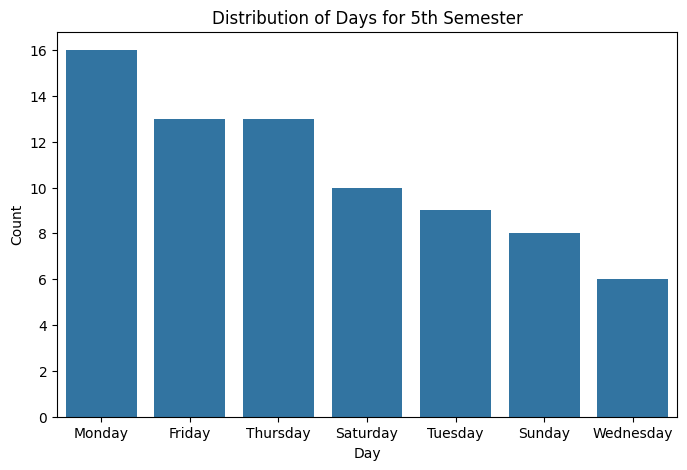

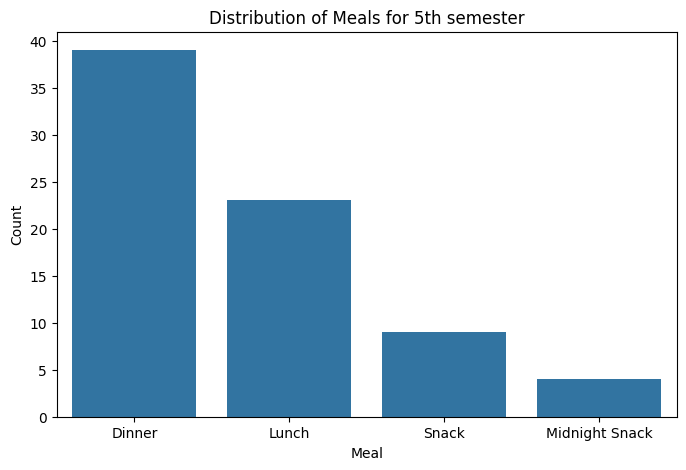

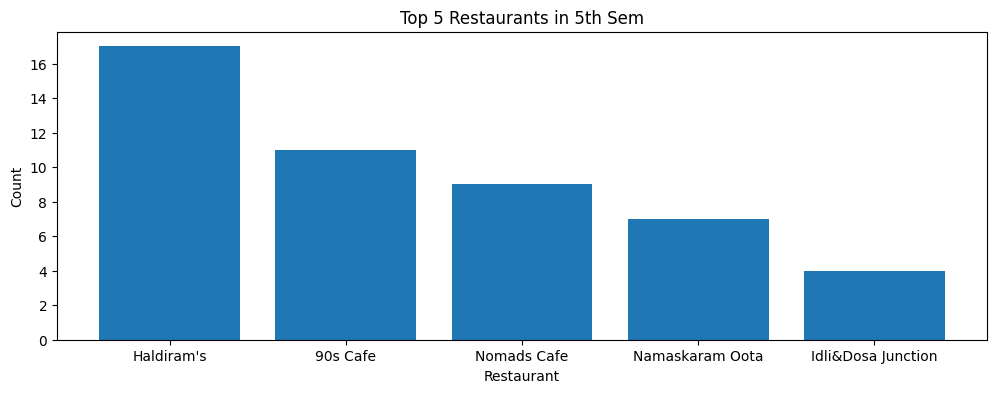

In [ ]:
#distribution of day for the 5th semester


df_5_sem = df.copy()
df_5_sem['Date '] = pd.to_datetime(df_5_sem['Date '])
df_5_sem = df_5_sem[df_5_sem['Date '] >= '2024-08-01']

df_5_sem.head()

plt.figure(figsize=(8, 5))
sns.countplot(x='Day', data=df_5_sem ,order=df_5_sem['Day'].value_counts().index)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Distribution of Days for 5th Semester')
plt.show()


#Distribution of meal

plt.figure(figsize=(8, 5))
sns.countplot(x='Meal', data=df_5_sem ,order=df_5_sem['Meal'].value_counts().index)
plt.xlabel('Meal')
plt.ylabel('Count')
plt.title('Distribution of Meals for 5th semester')
plt.show()


plt.figure(figsize=(12, 4))
restaurant_counts = df_5_sem['Restaurant'].value_counts().head(5)
plt.bar(restaurant_counts.index, restaurant_counts.values)
# plt.xticks(rotation=90)
plt.xlabel('Restaurant')
plt.ylabel('Count')
plt.title('Top 5 Restaurants in 5th Sem')
plt.show()